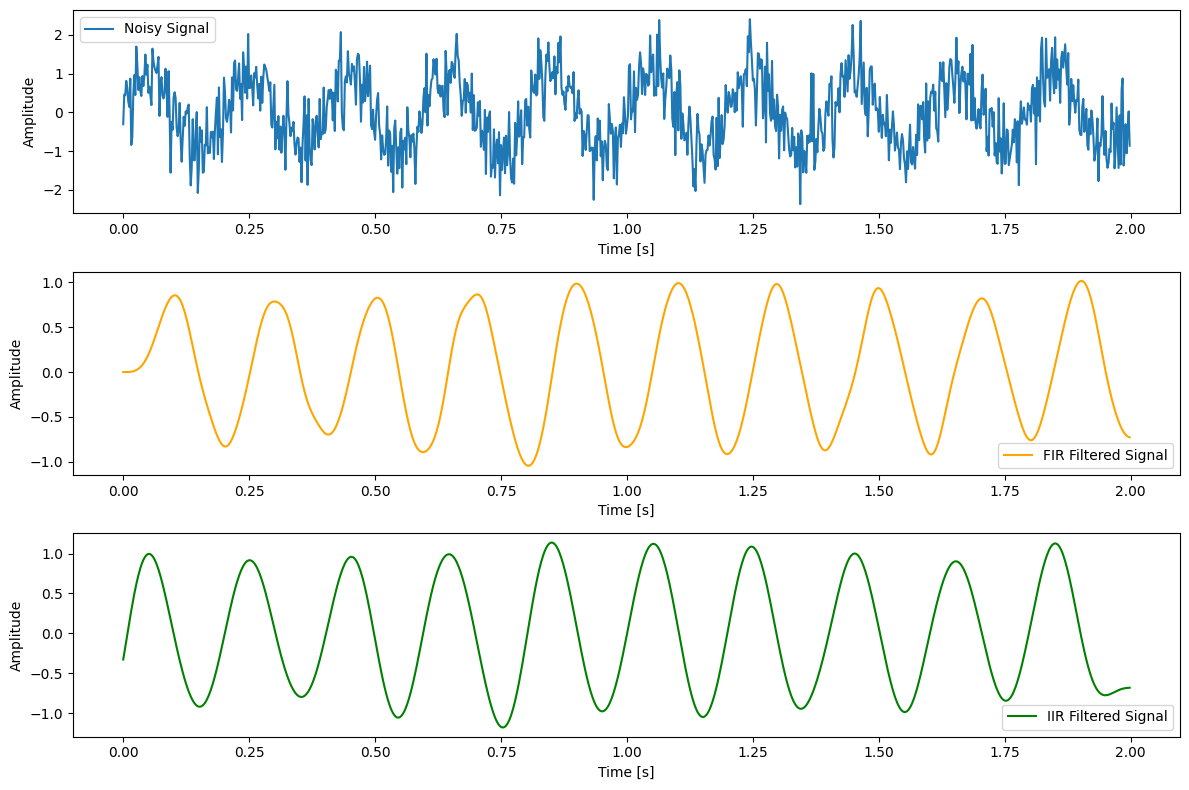

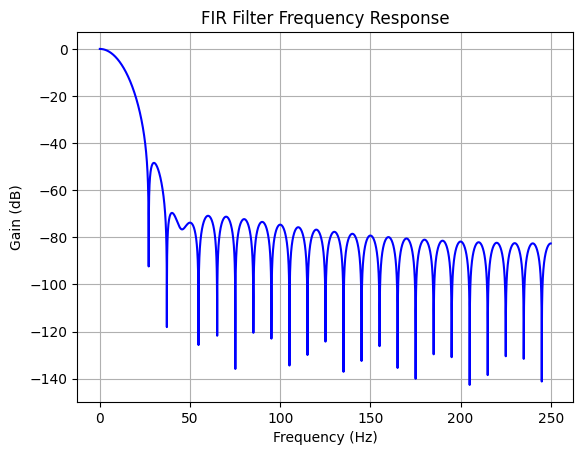

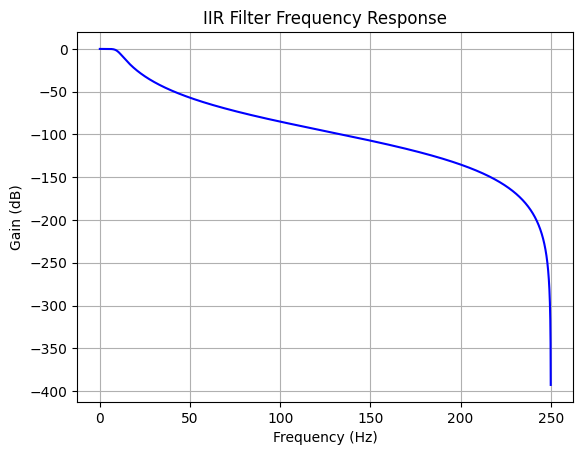

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, freqz, butter, filtfilt

def design_fir_filter(order, cutoff, fs, filter_type='low'):
  nyq = 0.5 *fs
  normalized_cutoff = np.array(cutoff) / nyq
  if filter_type == 'low':
    pass_zero = True
  elif filter_type == 'high':
    pass_zero = False
  elif filter_type in ['bandpass', 'bandstop']:
    pass_zero = filter_type
  else:
    raise ValueError("Invalid filter_type. Choose from 'low', 'high', 'bandpass', 'bandstop'.")
  fir_coeff = firwin(order + 1, normalized_cutoff, pass_zero=pass_zero)
  return fir_coeff


def design_iir_filter(order, cutoff, fs, filter_type='low'):
  nyq = 0.5 * fs
  normalized_cutoff = np.array(cutoff) / nyq
  b, a = butter(order, normalized_cutoff, btype=filter_type, analog=False)
  return b, a

def apply_filter(b, a, signal, use_filtfilt=False):
  if use_filtfilt:
    filtered_signal = filtfilt(b, a, signal) # zero-phase filtering
  else:
    filtered_signal = lfilter(b, a, signal)
  return filtered_signal

def plot_frequency_response(b, a=1, fs=1.0, title='Frequency Response'):
  w, h = freqz(b, a, worN=8000)

  plt.plot((fs * 0.5 / np.pi) * w, 20 * np.log10(abs(h)), 'b')
  plt.title(title)
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Gain (dB)')
  plt.grid(True)
  plt.show()
if __name__ == "__main__":
  fs = 500.0 # Sampling frequency (Hz)
  t = np.arange(0, 2.0, 1/fs) # Time vector for 2 seconds

# Create a noisy signal: 5 Hz sine + white noise + 50 Hz interference
  freq_signal = 5.0
  noisy_signal = (np.sin(2 * np.pi * freq_signal * t) +0.5 * np.random.randn(len(t)) +0.3 * np.sin(2 * np.pi * 50 * t))

# Filter parameters
  fir_order = 50
  iir_order = 4
  cutoff = 10 # cutoff frequency (Hz)
  filter_type = 'low' # lowpass filter

# Design FIR filter
  fir_b = design_fir_filter(fir_order, cutoff, fs, filter_type)

# Design IIR filter

  iir_b, iir_a = design_iir_filter(iir_order, cutoff, fs, filter_type)

# Apply filters
  fir_filtered = lfilter(fir_b, [1.0], noisy_signal)
  iir_filtered = apply_filter(iir_b, iir_a, noisy_signal, use_filtfilt=True)

# Plot time domain signals
  plt.figure(figsize=(12, 8))

  plt.subplot(3, 1, 1)
  plt.plot(t, noisy_signal, label='Noisy Signal')
  plt.legend()
  plt.xlabel('Time [s]')
  plt.ylabel('Amplitude')

  plt.subplot(3, 1, 2)
  plt.plot(t, fir_filtered, label='FIR Filtered Signal', color='orange')
  plt.legend()
  plt.xlabel('Time [s]')
  plt.ylabel('Amplitude')

  plt.subplot(3, 1, 3)
  plt.plot(t, iir_filtered, label='IIR Filtered Signal', color='green')
  plt.legend()
  plt.xlabel('Time [s]')
  plt.ylabel('Amplitude')

  plt.tight_layout()

  plt.show()

# Plot frequency responses
  plot_frequency_response(fir_b, fs=fs, title='FIR Filter Frequency Response')
  plot_frequency_response(iir_b, iir_a, fs=fs, title='IIR Filter Frequency Response')